In [1]:
from matplotlib import colormaps as cm, pyplot as plt
import numpy as np

from carpy.physicalchem import (
    species, IdealGas, VanderWaals as VdW, RedlichKwong as RK, SoaveRedlichKwong as SRK,
    SRKmodPeneloux as SRKmP, PengRobinson as PR, HydrogenGas as HG
)
from carpy.utility import Quantity

In [2]:
equations_of_state = (IdealGas, VdW, RK, SRK, SRKmP, PR, HG)

In [3]:
gases_kwargs = {
    # "Air": {"p_c": Quantity(37.858, "bar"), "T_c": Quantity(-140.52, "degC")},
    "H2": {"p_c": Quantity(13.0, "bar"), "T_c": Quantity(-240, "degC"), "T_boil": 20.28, "c":-4e-6},
}

Computing parameters of H2...IdealGas, VanderWaals, RedlichKwong, SoaveRedlichKwong, SRKmodPeneloux, PengRobinson, HydrogenGas, 

C:\Users\yr3g17\PycharmProjects\carpy\src\carpy\physicalchem\_equations_of_state.py:667: RuntimeWarning: All-NaN axis encountered
  molar_volumes.flat[i] = np.nanmax(roots)
C:\Users\yr3g17\PycharmProjects\carpy\src\carpy\physicalchem\_equations_of_state.py:669: RuntimeWarning: All-NaN axis encountered
  molar_volumes.flat[i] = np.nanmin(roots)


done!


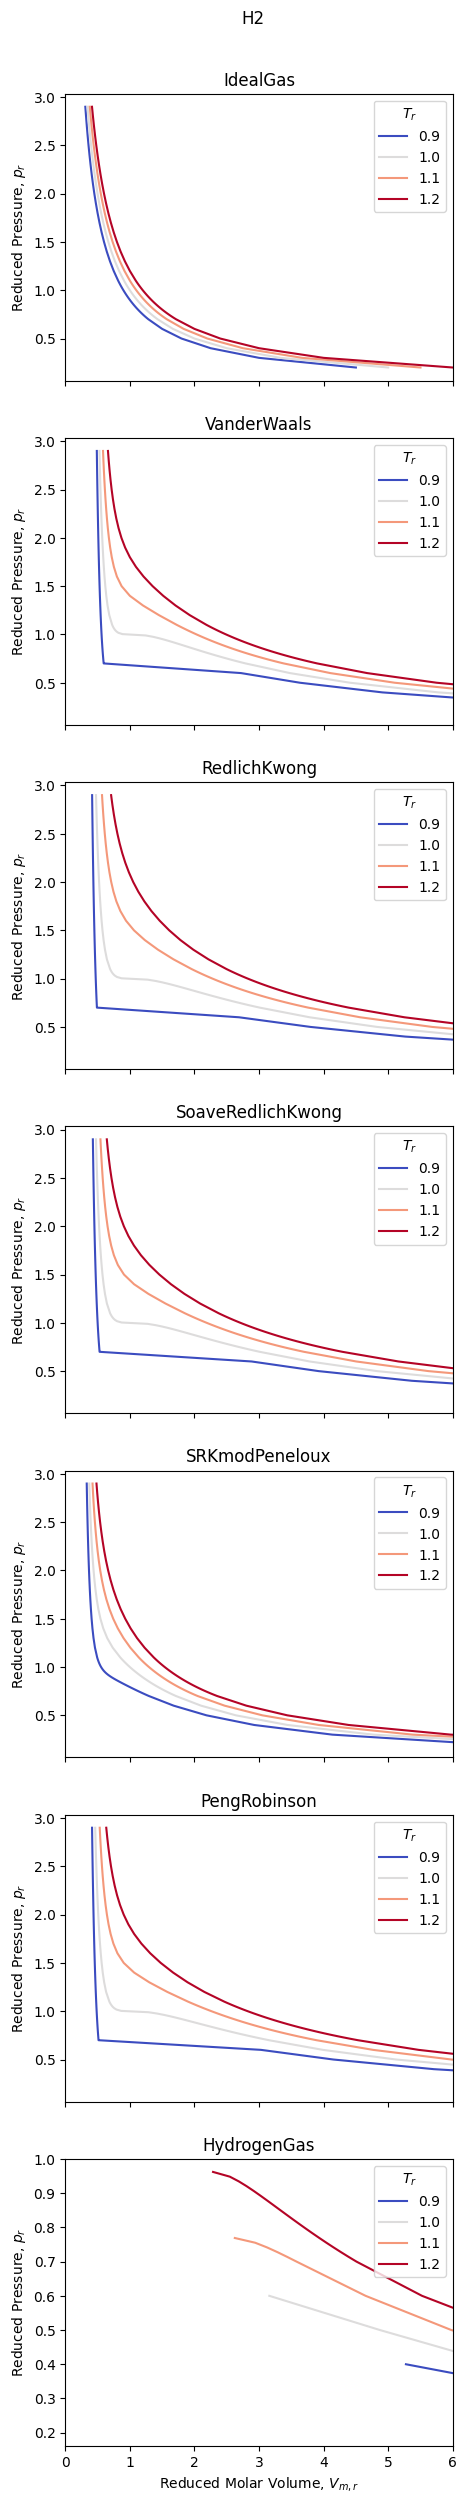

In [4]:
T_rs = np.array([0.9, 1.0, 1.1, 1.2])
hi_res_zone = np.linspace(0.7, 1.1, 30)
p_rs = np.hstack((
    np.arange(0.2, hi_res_zone.min(), 0.1),
    hi_res_zone,
    np.arange(hi_res_zone.max(), 3, 0.1)
))

cmap = cm.get_cmap("coolwarm")

def get_colour(x):
    """Get (R, G, B, A) scaled with reduced temperature array, such that T_r=1.0 corresponds to white."""
    y = np.interp(x, (T_rs.min(), 1.0, T_rs.max()), (0, 0.5, 1.0))
    c = cmap(y)
    return c


for gas_name, kwargs in gases_kwargs.items():

    n_models = len(equations_of_state)
    fig, axs = plt.subplots(n_models, sharex=True, figsize=(5, 4*n_models))
    fig.subplots_adjust(top=0.95)
    fig.suptitle(gas_name)

    print(f"Computing parameters of {gas_name}", end="...")

    for i, eos in enumerate(equations_of_state):

        print(f"{eos.__name__}", end=", ")

        mygas = eos(**kwargs)
        
        for T_r in T_rs:
    
            ps = mygas.p_c * p_rs
            T = mygas.T_c * T_r
            Vms = mygas.molar_volume(p=ps, T=T)
            Vm_rs = Vms / mygas.Vm_c
    
            axs[i].plot(Vm_rs, p_rs, label=f"{T_r}", c=get_colour(T_r))
        
        axs[i].set_title(eos.__name__)
        axs[i].set_ylabel("Reduced Pressure, $p_r$")
        axs[i].legend(title="$T_r$", loc="upper right")
        axs[i].set_xlim(0, 6)

    print("done!")
    
    axs[i].set_xlabel("Reduced Molar Volume, $V_{m,r}$")
    plt.show()

In [5]:
# Density of liquid hydrogen as a VdW gas
species.hydrogen().molar_mass / VdW(**gases_kwargs["H2"]).molar_volume(p=101325, T=20)

Quantity([58.45763639], kg m^{-3})

In [21]:
from carpy.physicalchem import UnreactiveFluidModel, species, SoaveRedlichKwong

model = UnreactiveFluidModel(eos_class=SoaveRedlichKwong)
model.X = {species.hydrogen(): 1}

print(model.density(p=101325, T=21))

[1.27357058] kg m^{-3}
